# PCA Lab II

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics


%matplotlib inline

## Step 1: Setup the Data

After you've downloaded the data from the repository, go ahead and load it with Pandas

In [2]:
airports = pd.read_csv('../../assets/datasets/airport_operations.csv')

In [3]:
airports.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [49]:
airports.shape

(841, 15)

In [70]:
cleaned_airports = airports.ix[:,2:14]

## Step 2: Explore the Data

Next - Let's plot! You can use any plotting library of your choice, but be sure to explore all of the data.

In [4]:
#Students add your plots here!

## Step 3: Define the Variables

Next, let's define the x and y variables: Airport is going to be our "x" variable

In [5]:
x = airports.ix[:,2:14].values
y = airports.ix[:,0].values

In [51]:
x.shape

(841, 12)

## Step 4: Covariance Matrix

Then, standardize the x variable for analysis

In [28]:
xStand = StandardScaler().fit_transform(x)
#print airports.ix[:,2:14]

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [29]:
covMat = np.cov(xStand.T)
eigenValues, eigenVectors = np.linalg.eig(covMat)

# Step 5: Eigenpairs

Then, check your eigenvalues and eigenvectors:

In [30]:
print(eigenValues)
print(eigenVectors)

[  5.71594128e+00   4.10771763e+00   8.46070622e-01   4.92674626e-01
   4.68096266e-01   1.66713004e-01   8.78260266e-02   7.27989129e-02
   5.25813963e-02   2.99299918e-03   1.67049793e-04   7.05899593e-04]
[[  1.92844661e-01   3.85272521e-01  -4.00175037e-01   1.64039585e-01
   -1.86296653e-01  -2.78156147e-01  -7.86539360e-02  -3.17041164e-02
   -7.52767812e-02  -1.14438376e-02  -7.07864735e-01  -3.44682322e-02]
 [  1.92353674e-01   3.85057896e-01  -4.02190449e-01   1.66802678e-01
   -1.84403875e-01  -2.78351867e-01  -9.04981279e-02  -3.77083630e-02
   -8.09001581e-02   1.35190021e-02   7.04235896e-01   3.71215770e-02]
 [ -2.87689649e-01   3.33455724e-01   2.51323774e-01  -8.13357968e-02
   -7.50865080e-03  -2.37735910e-02   5.78177983e-02  -1.41563250e-02
   -4.95309257e-01  -6.57324120e-01   2.23495764e-02  -2.32792117e-01]
 [ -3.80590914e-01   1.72431188e-01   8.79462334e-02  -7.06458258e-02
   -2.02464908e-01  -3.45123821e-03   3.15914078e-01  -9.30547916e-02
   -4.84973886e-01 

To find the principal componants, find th eigenpairs, and sort them from highest to lowest. 

In [31]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i[0])

5.71594128131
4.10771763057
0.846070621527
0.492674626426
0.468096266456
0.166713003709
0.0878260265801
0.0727989128724
0.0525813962709
0.0029929991831
0.000705899593355
0.000167049792639


## Step 6: Explained Variance

In [32]:
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]

In [33]:
print(varExpl)

[47.576205670809017, 34.190277543366385, 7.0422049354191847, 4.1007400534903597, 3.8961639300747142, 1.3876230986505989, 0.73101330090439398, 0.60593625458598088, 0.43765728168431423, 0.024912002713084799, 0.0058755019660898774, 0.0013904263358757267]


Now, calculate the explained variance and the Cumulative explained variance

In [34]:
cvarex = np.cumsum(varExpl)

In [35]:
print(cvarex)

[ 47.57620567  81.76648321  88.80868815  92.9094282   96.80559213
  98.19321523  98.92422853  99.53016479  99.96782207  99.99273407
  99.99860957 100.        ]


** What does the explained variance tell us?**: Here, we can see that 81.77% of the behavior can be explained by the first two principal componants

## Step 7: Perform the PCA

Instead of creating the projection matrix, we're going to use Scikit's built in function. Now that we have discovered the principal componants, we have an educated idea on how many componants to pass to the function. 

In [41]:
pcask = PCA(n_components=2)
Y = pcask.fit_transform(xStand)
#print xStand


array([[ 0.19284466,  0.19235367, -0.28768965, -0.38059091, -0.28589409,
         0.31936533,  0.27207765,  0.24798223,  0.39205625,  0.29898968,
         0.19035946,  0.31560337],
       [-0.38527252, -0.3850579 , -0.33345572, -0.17243119, -0.33630104,
         0.29522254, -0.3052633 , -0.32370749,  0.13695963, -0.05164521,
        -0.37717473, -0.02138591]])

Create a dataframe from the PCA results

In [15]:
Ydf = pd.DataFrame(Y, columns=["PC1", "PC2"])

In [21]:
print Ydf

          PC1       PC2
0   -2.086696  0.426938
1   -2.440534  0.294452
2   -2.033885  0.630585
3   -1.604414  0.419835
4   -2.086842  0.376771
5   -3.048835  0.187962
6   -2.703473  0.431451
7   -2.471767  0.497068
8   -2.772989  0.340358
9   -1.645867  1.002922
10  -1.118104  1.393783
11   2.196168  2.265982
12   1.179636  1.340775
13   0.859411  0.859569
14   1.011741  0.904612
15   0.430508  0.396326
16  -0.812265  0.573046
17  -0.320218  0.931185
18  -0.966353  0.341617
19  -1.982967 -0.102187
20  -2.183663 -0.273853
21  -1.407687  0.004206
22   4.686180 -4.413432
23   4.253171 -3.919612
24   5.563601 -4.540813
25   5.120844 -4.536750
26   4.745702 -5.167904
27   5.098754 -5.563540
28   3.417418 -5.501340
29   2.675366 -5.222092
..        ...       ...
811 -0.881781  0.180281
812 -1.167762  0.142678
813 -2.027814  0.053248
814 -1.728210 -0.094847
815 -2.249495 -0.057864
816 -2.359290 -0.079863
817 -1.628215  0.289249
818 -0.671460  0.701628
819 -1.048582  1.540708
820 -1.894998  1

Now, create a new dataframe that uses the airport and year from the original set and join the PCA results with it to form a new set

In [65]:
airports2 = airports[['airport', 'year']]
print airports2.columns

Index([u'airport', u'year'], dtype='object')


In [17]:
airport_pca = airports2.join(Ydf, on=None, how='left')

In [18]:
Ydf.head()

,PC1,PC2
0,-2.086696,0.426938
1,-2.440534,0.294452
2,-2.033885,0.630585
3,-1.604414,0.419835
4,-2.086842,0.376771


In [62]:
airport_pca.head()

,airport,year,PC1,PC2
0,ABQ,2004,-2.086696,0.426938
1,ABQ,2005,-2.440534,0.294452
2,ABQ,2006,-2.033885,0.630585
3,ABQ,2007,-1.604414,0.419835
4,ABQ,2008,-2.086842,0.376771


Next, graph the results onto the new feature space

In [63]:
# graph = airport_pca.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

# for i, airport in enumerate(airports['airport']):
#     graph.annotate(airport, (airport_pca.iloc[i].PC2, airport_pca.iloc[i].PC1))

In [71]:
pca_loadings = pd.DataFrame(pcask.components_.T, columns=['V1', 'V2'], index=cleaned_airports.columns )
print pca_loadings

                                          V1        V2
departures for metric computation   0.192845 -0.385273
arrivals for metric computation     0.192354 -0.385058
percent on-time gate departures    -0.287690 -0.333456
percent on-time airport departures -0.380591 -0.172431
percent on-time gate arrivals      -0.285894 -0.336301
average_gate_departure_delay        0.319365  0.295223
average_taxi_out_time               0.272078 -0.305263
average taxi out delay              0.247982 -0.323707
average airport departure delay     0.392056  0.136960
average airborne delay              0.298990 -0.051645
average taxi in delay               0.190359 -0.377175
average block delay                 0.315603 -0.021386


In [81]:
df_plot = pd.DataFrame(Ydf, columns=['PC1', 'PC2'])
df_plot.sort_values(by='PC1', ascending=False)

,PC1,PC2
344,10.647381,-3.438635
798,8.634244,7.737879
800,8.500650,7.915633
223,8.407751,-2.122599
801,8.264704,7.919532
377,8.257199,-1.964246
802,8.185173,8.224209
222,8.033613,-2.705953
345,7.899324,-3.622659
797,7.857903,7.835621


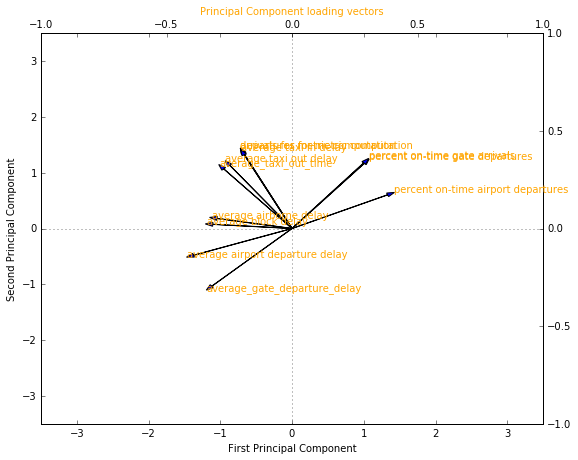

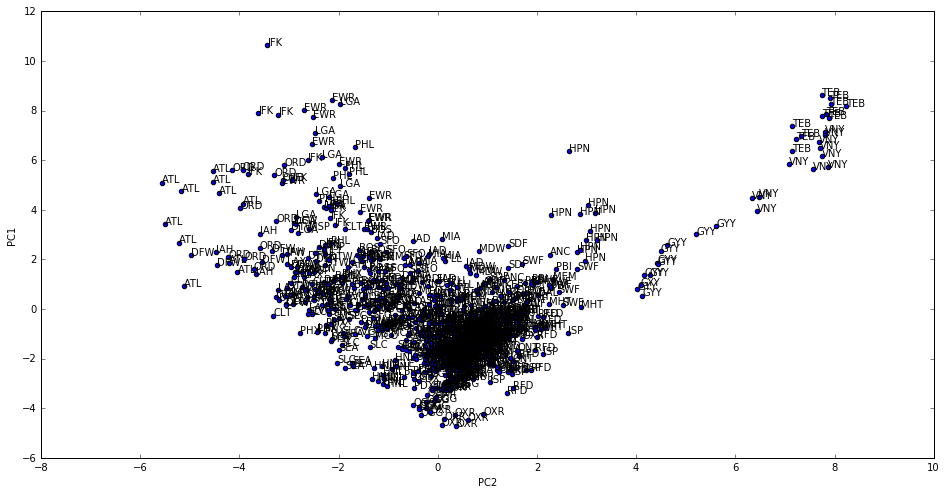

In [74]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# Plot Principal Components 1 and 2
# for i in df_plot.index:
#     ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
    
graph = airport_pca.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, airport in enumerate(airports['airport']):
    graph.annotate(airport, (airport_pca.iloc[i].PC2, airport_pca.iloc[i].PC1))
    
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
for i in range(0, len(pca_loadings)):
    ax2.arrow(0,0,-pca_loadings.V1[i], -pca_loadings.V2[i])

**What does the graph tell us?**

We are able to interpret and find relationships between samples and variables by comparing the score and loading plots, above. Which values "flock" together?

## Step 8: Cluster with K-Means

Set up the k-means clustering analysis. Use the graph from above to derive "k"

In [83]:
#Standard Scalar of the dataframe
print x

[[  5.39710000e+04   5.38180000e+04   8.03000000e-01 ...,   2.46000000e+00
    8.30000000e-01   2.55000000e+00]
 [  5.18290000e+04   5.18770000e+04   8.14000000e-01 ...,   2.26000000e+00
    8.90000000e-01   2.34000000e+00]
 [  4.96820000e+04   5.11990000e+04   7.98300000e-01 ...,   2.12000000e+00
    8.40000000e-01   2.66000000e+00]
 ..., 
 [  4.75300000e+03   4.78700000e+03   3.90900000e-01 ...,   3.57000000e+00
    0.00000000e+00   3.84000000e+00]
 [  6.09600000e+03   6.16500000e+03   3.92400000e-01 ...,   2.15000000e+00
    0.00000000e+00   2.91000000e+00]
 [  7.41200000e+03   7.57300000e+03   4.01400000e-01 ...,   2.92000000e+00
    0.00000000e+00   3.89000000e+00]]


In [84]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit(x)

Compute the labels and centroids

In [85]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [86]:
print(centroids)

[[  5.67404133e+04   5.65695283e+04   7.59414000e-01   7.28606333e-01
    7.48287333e-01   1.36144000e+01   1.19729833e+01   2.52395000e+00
    1.53959000e+01   2.60661667e+00   9.44200000e-01   3.11603333e+00]
 [  2.36514282e+05   2.35399046e+05   7.75831950e-01   6.78621577e-01
    7.69203734e-01   1.34294606e+01   1.80114523e+01   5.99892116e+00
    1.83762656e+01   3.70452282e+00   2.35643154e+00   3.86539419e+00]]


Compute the Silhoutte Score

In [87]:
metrics.silhouette_score(x, labels, metric='euclidean')

0.67002249577326389

Lastly, plot the new two-dimensional data along with their cluster assignments: 

In [88]:
airport_pca['cluster'] = pd.Series(clusters.labels_)

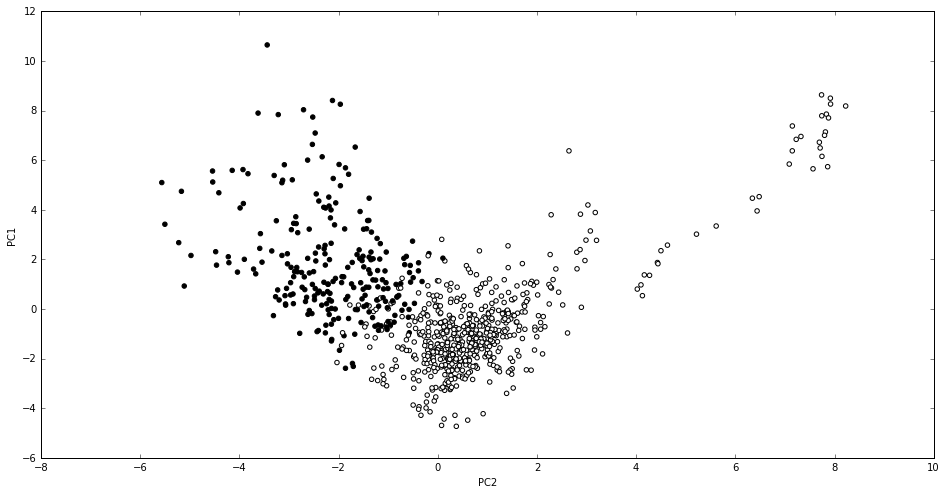

In [89]:
graph2 =airport_pca.plot(
    kind='scatter',
    x='PC2',y='PC1',
    c=airport_pca.cluster.astype(np.float), 
    figsize=(16,8))

for i, airport in enumerate(airports['airport']):
    graph.annotate(airport, (airport_pca.iloc[i].PC2, airport_pca.iloc[i].PC1))

In [109]:
print airport_pca.columns

Index([u'airport', u'year', u'PC1', u'PC2', u'cluster'], dtype='object')


In [161]:
col_airports_c1 = airport_pca[airport_pca.cluster == 1]['airport'].value_counts()
print len(col_airports_c1)
print list(col_airports_c1.index)
#print col_airports_c1

25
['LAS', 'MSP', 'DFW', 'SEA', 'IAH', 'SFO', 'PHL', 'ATL', 'BOS', 'EWR', 'JFK', 'LGA', 'PHX', 'LAX', 'DEN', 'CLT', 'ORD', 'DTW', 'MIA', 'IAD', 'MCO', 'MEM', 'SLC', 'CVG', 'PIT']


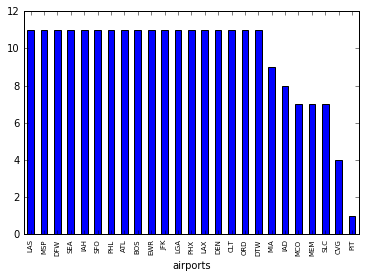

In [169]:
#print airport_pca[airport_pca.cluster == 1]['airport'].value_counts()
ax = airport_pca[airport_pca.cluster == 1]['airport'].value_counts().plot(kind='bar');
ax.set_xlabel("airports");
ax.set_xticklabels(list(col_airports_c1.index), rotation='vertical', size='x-small');


25


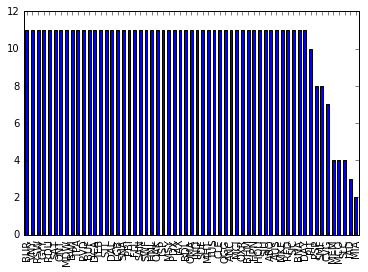

In [170]:
#print airport_pca[airport_pca.cluster == 0]['airport'].value_counts()
col_airports_c0 = airport_pca[airport_pca.cluster == 1]['airport'].value_counts()
print len(col_airports_c0)

airport_pca[airport_pca.cluster == 0]['airport'].value_counts().plot(kind='bar');

ax.set_xticklabels(list(col_airports_c0.index), rotation='vertical', size='x-small');
